In [1]:
!pip install networkx

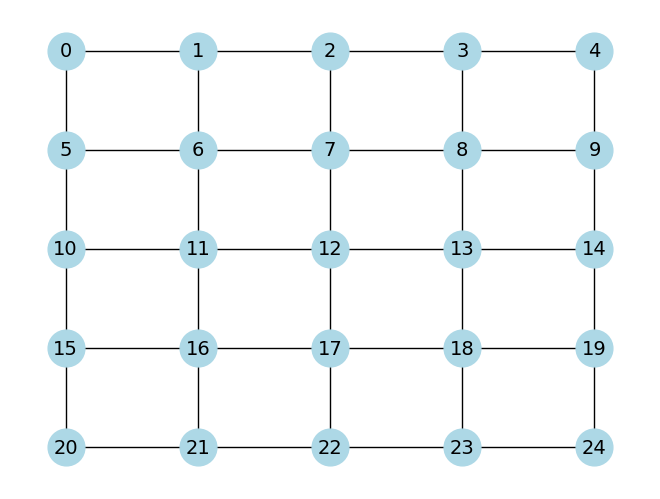

In [31]:
import networkx as nx
import matplotlib.pyplot as plt
import math

def create_grid_graph(n, plot_grid=False):
    """
    Creates a grid graph with n nodes, where n is a perfect square.
    """
    G = nx.Graph()

    # Determine the size of the grid
    side_length = int(math.sqrt(n))

    # Add nodes to the graph
    for i in range(n):
        G.add_node(i)

    # Add edges based on closest neighbors
    edges = []
    for i in range(side_length):
        for j in range(side_length):
            node = i * side_length + j
            if j < side_length - 1:  # Add edge to the right neighbor
                edges.append((node, node + 1))
            if i < side_length - 1:  # Add edge to the bottom neighbor
                edges.append((node, node + side_length))

    G.add_edges_from(edges)

    if plot_grid:
        plot_graph(G, n)

    return G

def plot_graph(G, n):
    """
    Plots the grid graph.
    """
    side_length = int(math.sqrt(n))
    pos = {i: (i % side_length, side_length - 1 - i // side_length) for i in G.nodes()}
    nx.draw(G, pos, with_labels=True, node_size=700, node_color='lightblue', font_size=14)
    plt.show()

# Example usage
n = 25  # This can be any square number like 4, 9, 16, 25, etc.
G = create_grid_graph(n, plot_grid=True)



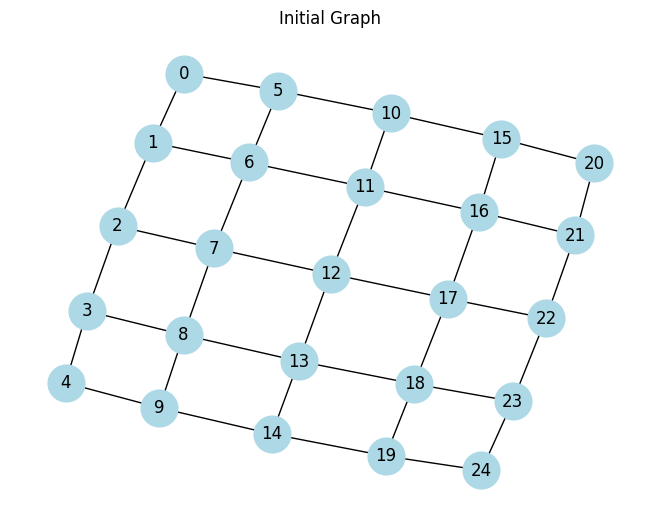

Selected Path: [0, 1, 2, 3, 8]


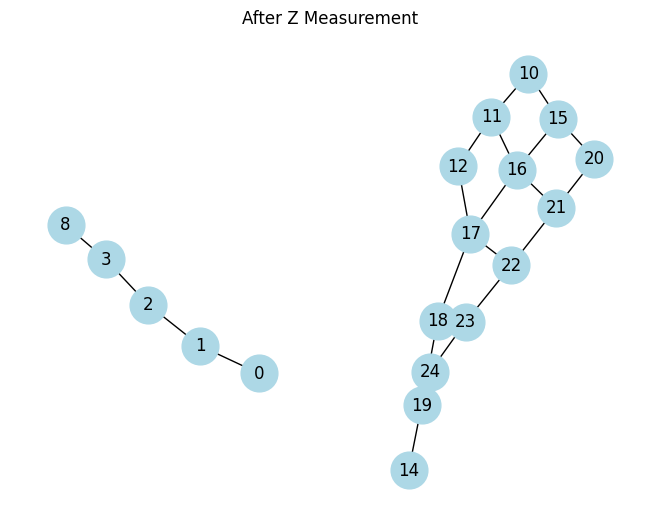

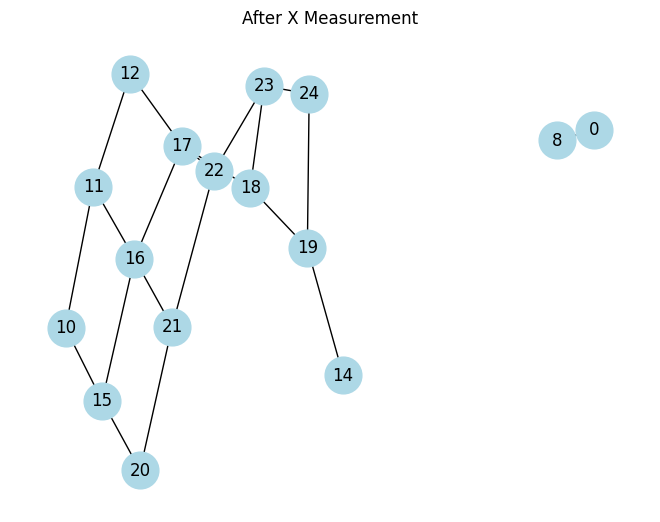

In [32]:
import networkx as nx
import matplotlib.pyplot as plt



# Visualize the initial network
def visualize_graph(graph, title="Graph"):
    pos = nx.spring_layout(graph)
    nx.draw(graph, pos, with_labels=True, node_color='lightblue', node_size=700)
    plt.title(title)
    plt.show()

visualize_graph(G, "Initial Graph")

# Function to find the shortest path with the minimum combined neighborhood
def shortest_path_min_combined_neighborhood(graph, source, target):
    all_paths = list(nx.all_shortest_paths(graph, source, target))
    min_combined_neighborhood_path = min(all_paths, key=lambda path: len(set(n for node in path for n in graph.neighbors(node))))
    return min_combined_neighborhood_path

# Function to apply Z measurement (remove nodes)
def z_measure(graph, nodes):
    graph.remove_nodes_from(nodes)

# Function to apply X measurement (remove node and connect its neighbors)
def x_measure(graph, node):
    neighbors = list(graph.neighbors(node))
    graph.remove_node(node)
    for i in range(len(neighbors)):
        for j in range(i + 1, len(neighbors)):
            if not graph.has_edge(neighbors[i], neighbors[j]):
                graph.add_edge(neighbors[i], neighbors[j])

# Repeater protocol function
def repeater_protocol(graph, source, target):
    path = shortest_path_min_combined_neighborhood(graph, source, target)
    print(f"Selected Path: {path}")

    # Find the union of the neighborhoods of the path
    path_neighbors = set(n for node in path for n in graph.neighbors(node)) - set(path)
    z_measure(graph, path_neighbors)
    visualize_graph(graph, "After Z Measurement")

    # Apply X measurement to the intermediate nodes on the path
    for node in path[1:-1]:
        x_measure(graph, node)
    visualize_graph(graph, "After X Measurement")

# Applying the repeater protocol
repeater_protocol(G, 0, 8)


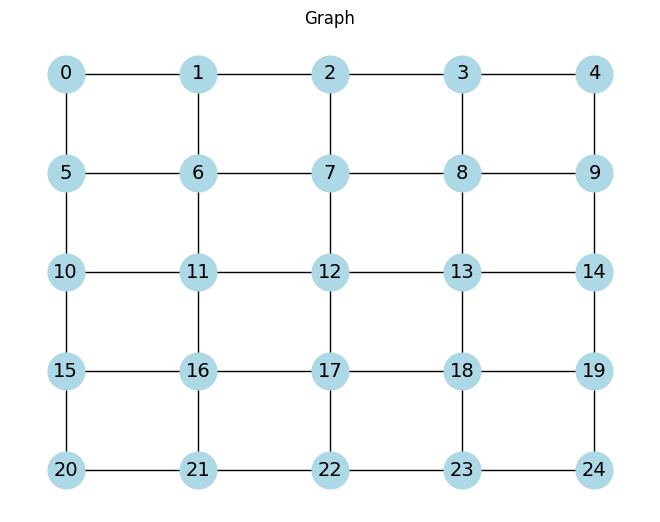

Selected Path: [0, 1, 2, 3, 4, 9, 14, 19, 24]


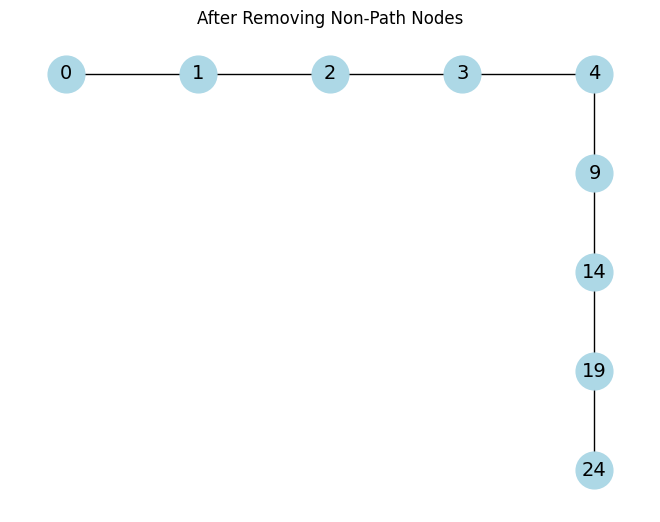

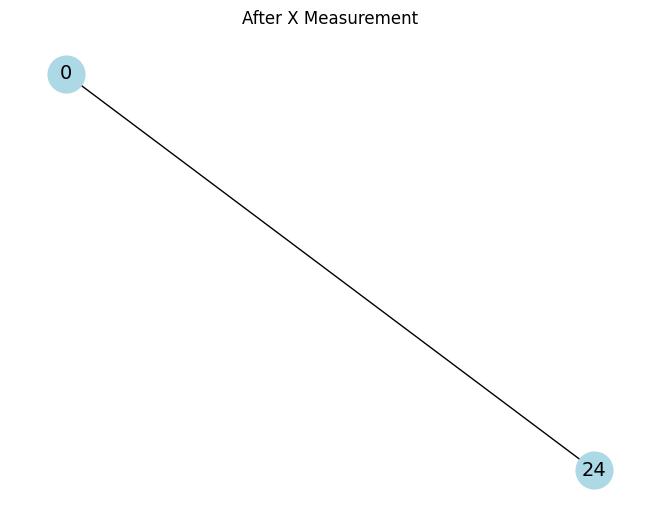

In [34]:
import networkx as nx
import matplotlib.pyplot as plt
import math

def create_grid_graph(n, plot_grid=False):
    """
    Creates a grid graph with n nodes, where n is a perfect square.
    """
    G = nx.Graph()

    # Determine the size of the grid
    side_length = int(math.sqrt(n))

    # Add nodes to the graph
    for i in range(n):
        G.add_node(i)

    # Add edges based on closest neighbors
    edges = []
    for i in range(side_length):
        for j in range(side_length):
            node = i * side_length + j
            if j < side_length - 1:  # Add edge to the right neighbor
                edges.append((node, node + 1))
            if i < side_length - 1:  # Add edge to the bottom neighbor
                edges.append((node, node + side_length))

    G.add_edges_from(edges)

    if plot_grid:
        plot_graph(G, n)

    return G

def plot_graph(G, n, title="Graph"):
    """
    Plots the grid graph.
    """
    side_length = int(math.sqrt(n))
    pos = {i: (i % side_length, side_length - 1 - i // side_length) for i in G.nodes()}
    nx.draw(G, pos, with_labels=True, node_size=700, node_color='lightblue', font_size=14)
    plt.title(title)
    plt.show()

def shortest_path_min_combined_neighborhood(graph, source, target):
    all_paths = list(nx.all_shortest_paths(graph, source, target))
    min_combined_neighborhood_path = min(all_paths, key=lambda path: len(set(n for node in path for n in graph.neighbors(node))))
    return min_combined_neighborhood_path

def z_measure(graph, nodes):
    graph.remove_nodes_from(nodes)

def x_measure(graph, node):
    neighbors = list(graph.neighbors(node))
    graph.remove_node(node)
    for i in range(len(neighbors)):
        for j in range(i + 1, len(neighbors)):
            if not graph.has_edge(neighbors[i], neighbors[j]):
                graph.add_edge(neighbors[i], neighbors[j])

def repeater_protocol(graph, source, target, n):
    path = shortest_path_min_combined_neighborhood(graph, source, target)
    print(f"Selected Path: {path}")

    # Remove all nodes not on the path
    all_nodes = set(graph.nodes)
    nodes_to_remove = all_nodes - set(path)
    z_measure(graph, nodes_to_remove)
    plot_graph(graph, n, "After Removing Non-Path Nodes")

    # Apply X measurement to the intermediate nodes on the path
    for node in path[1:-1]:
        x_measure(graph, node)
    plot_graph(graph, n, "After X Measurement")

# Example usage
n = 25  # This can be any square number like 4, 9, 16, 25, etc.
G = create_grid_graph(n, plot_grid=True)

# Applying the repeater protocol
source, target = 0, 24  # Example source and target
repeater_protocol(G, source, target, n)
